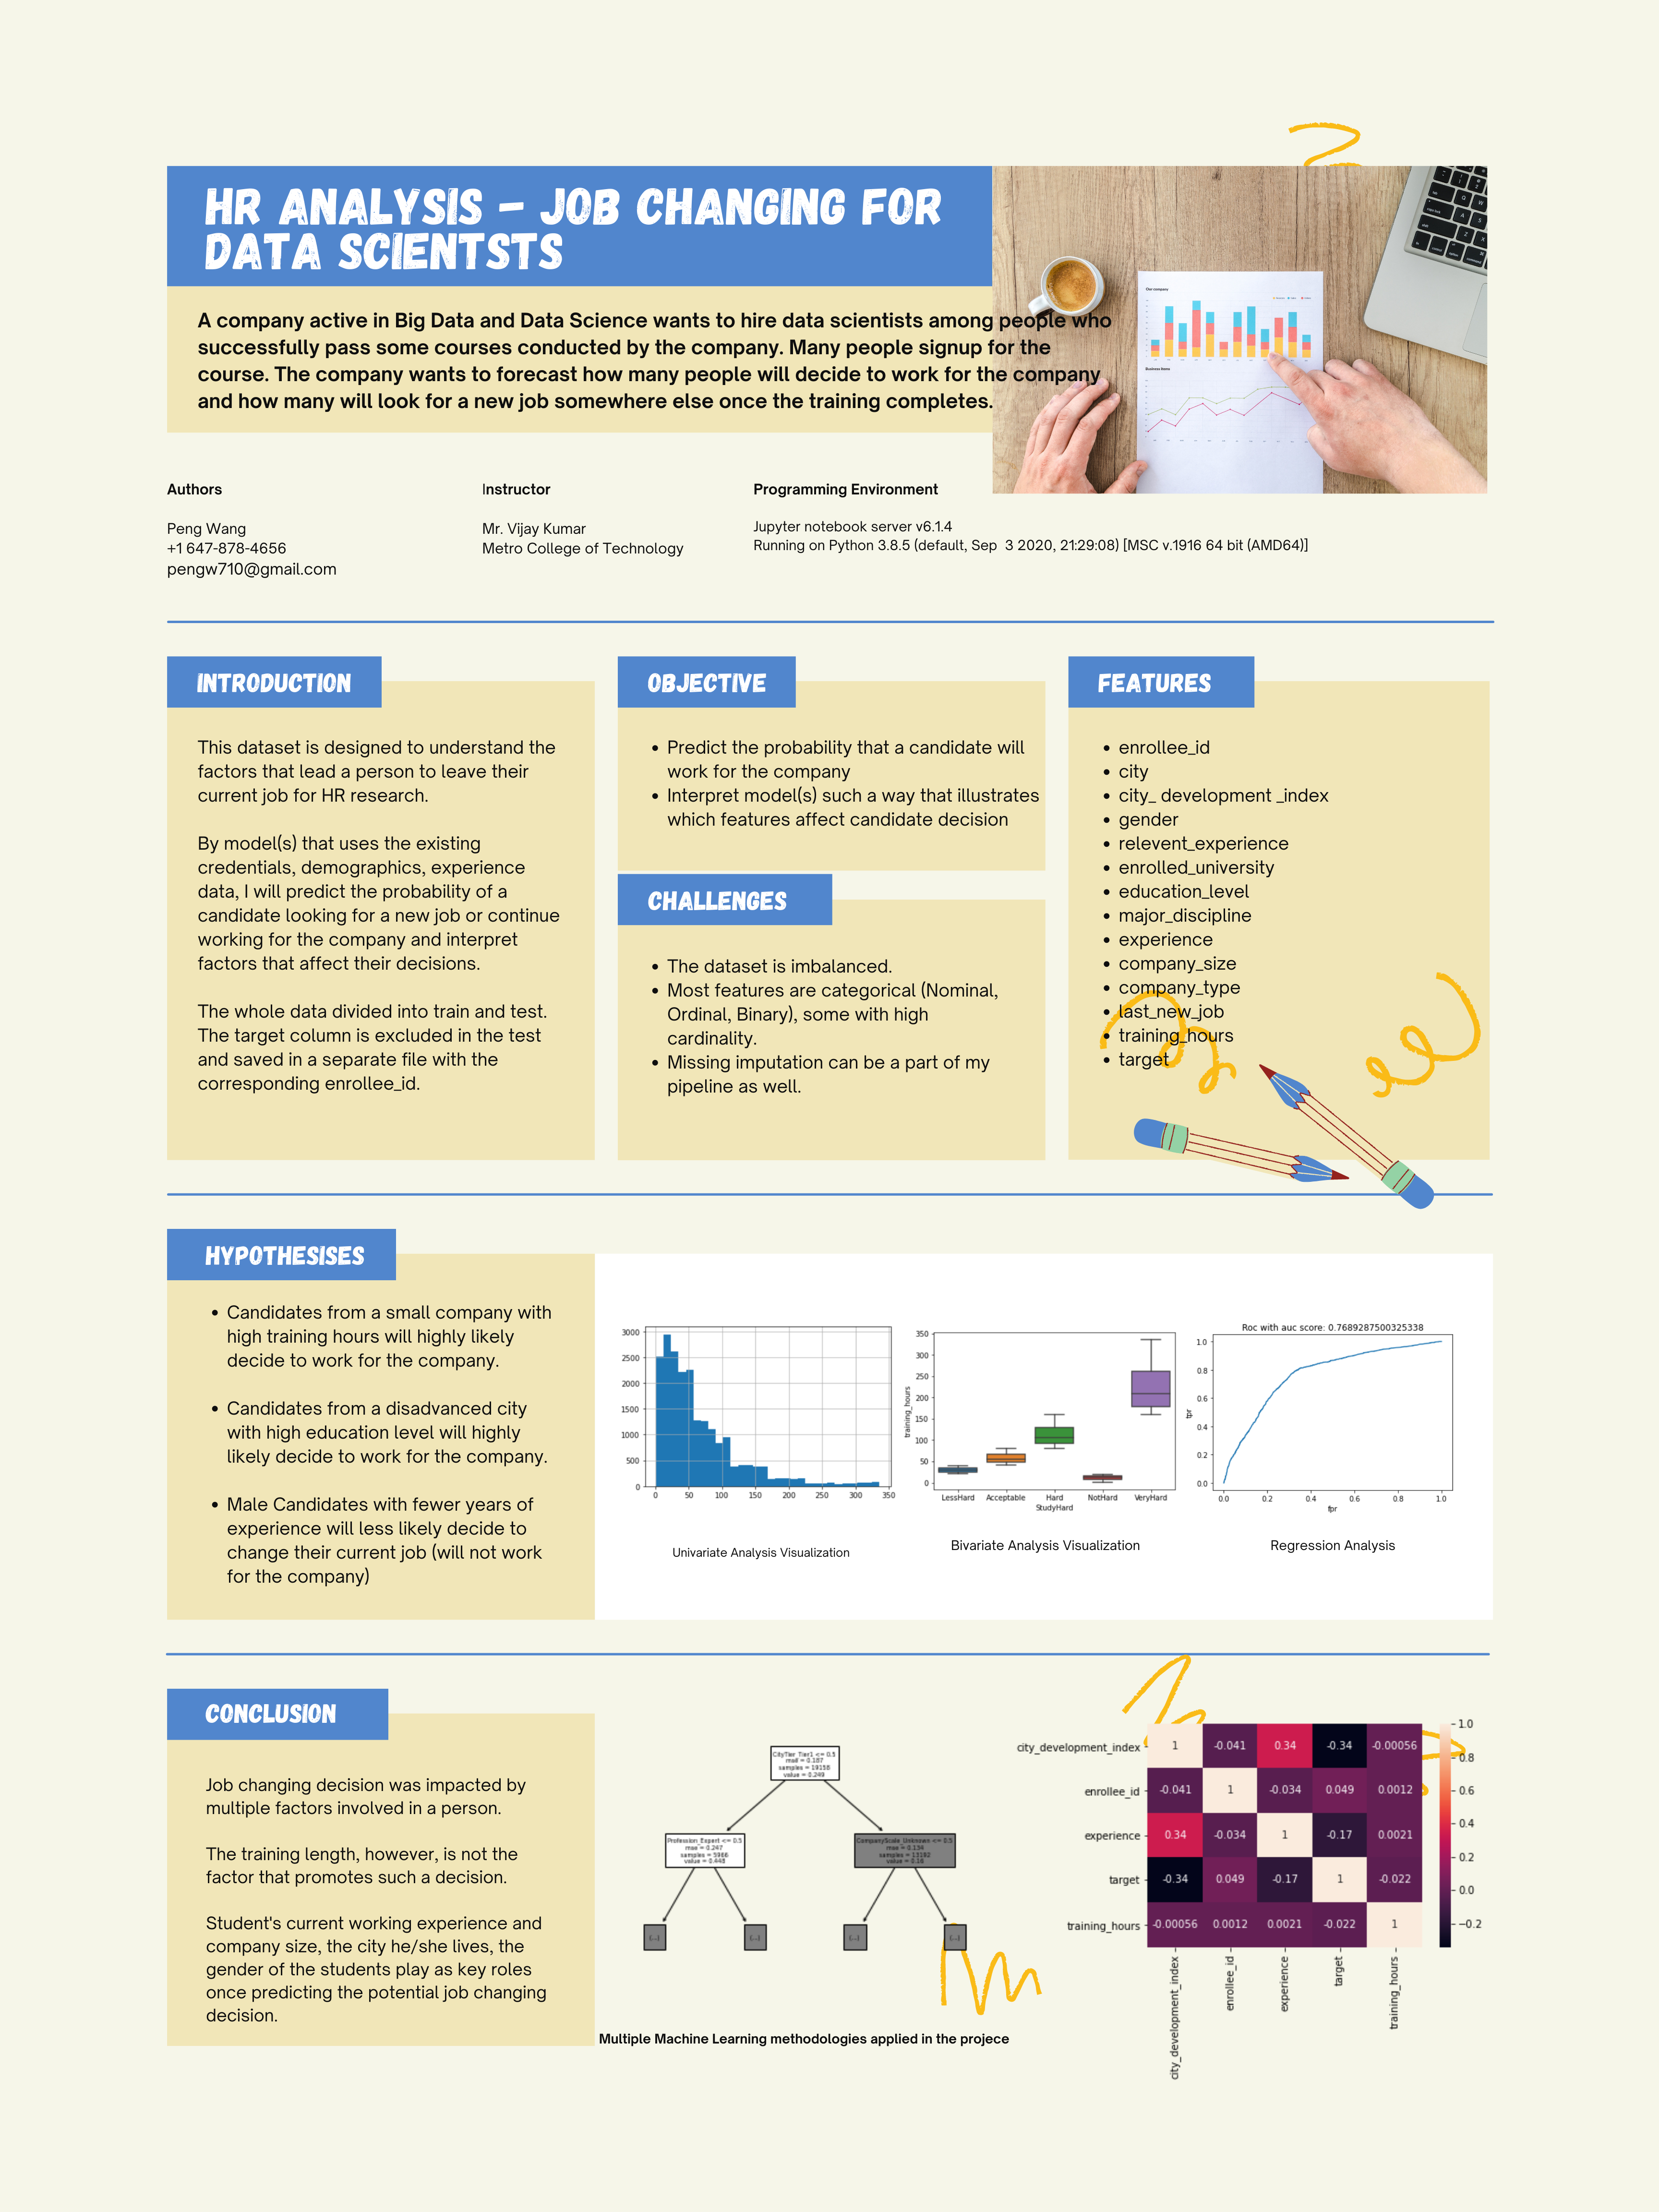

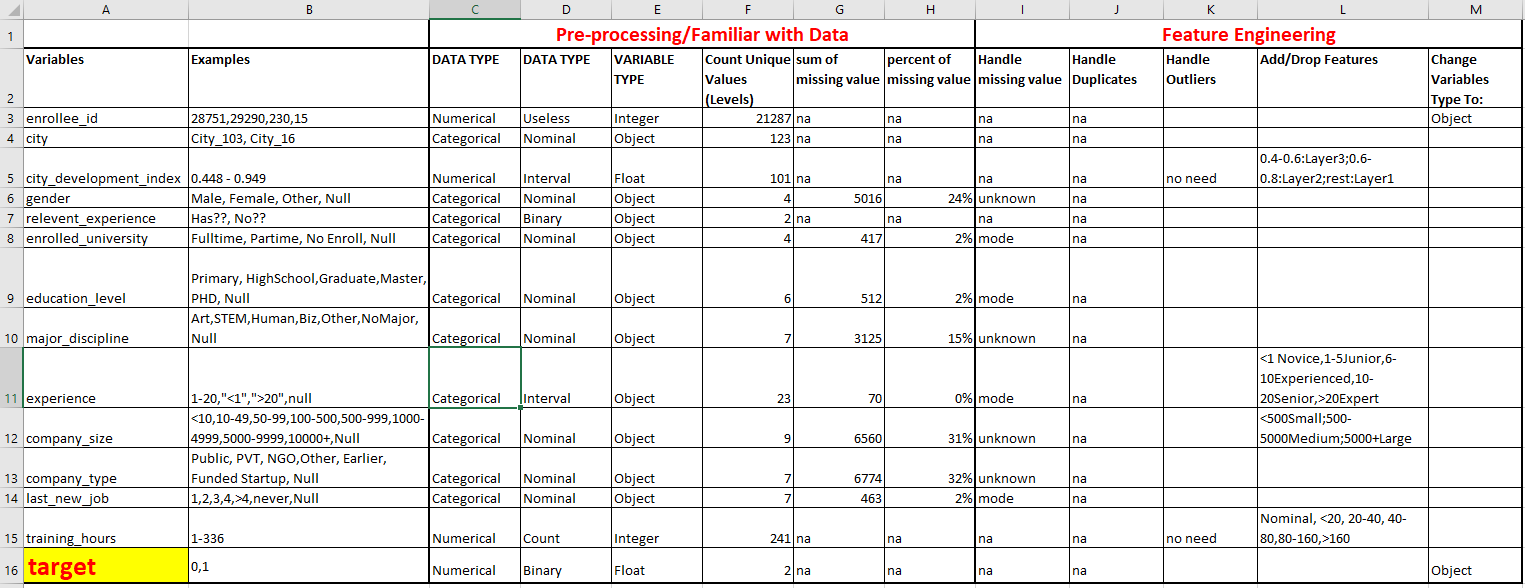

In [165]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Connect to Database

In [3]:
#Read Files:
train = pd.read_csv("data/aug_train.csv")
test = pd.read_csv("data/aug_test.csv")

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test],ignore_index=True,sort=True)

#Review and double check the shapes of three tables:
print(train.shape,test.shape,data.shape)

(19158, 15) (2129, 14) (21287, 15)


In [5]:
data.head(10)

city  city_development_index company_size    company_type  \
0  city_103                   0.920          NaN             NaN   
1   city_40                   0.776        50-99         Pvt Ltd   
2   city_21                   0.624          NaN             NaN   
3  city_115                   0.789          NaN         Pvt Ltd   
4  city_162                   0.767        50-99  Funded Startup   
5  city_176                   0.764          NaN             NaN   
6  city_160                   0.920        50-99  Funded Startup   
7   city_46                   0.762          <10         Pvt Ltd   
8  city_103                   0.920        50-99         Pvt Ltd   
9  city_103                   0.920       10000+         Pvt Ltd   

  education_level enrolled_university  enrollee_id experience gender  \
0        Graduate       no_enrollment         8949        >20   Male   
1        Graduate       no_enrollment        29725         15   Male   
2        Graduate    Full time course        11561          5    NaN   
3        Graduate                 NaN        33241         <1    NaN   
4         Masters       no_enrollment          666        >20   Male   
5        Graduate    Part time course        21651         11    NaN   
6     High School       no_enrollment        28806          5   Male   
7        Graduate       no_enrollment          402         13   Male   
8        Graduate       no_enrollment        27107          7   Male   
9        Graduate       no_enrollment          699         17    NaN   

  last_new_job major_discipline      relevent_experience source  target  \
0            1             STEM  Has relevent experience  train     1.0   
1           >4             STEM   No relevent experience  train     0.0   
2        never             STEM   No relevent experience  train     0.0   
3        never  Business Degree   No relevent experience  train     1.0   
4            4             STEM  Has relevent experience  train     0.0   
5            1             STEM  Has relevent experience  train     1.0   
6            1              NaN  Has relevent experience  train     0.0   
7           >4             STEM  Has relevent experience  train     1.0   
8            1             STEM  Has relevent experience  train     1.0   
9           >4             STEM  Has relevent experience  train     0.0   

   training_hours  
0              36  
1              47  
2              83  
3              52  
4               8  
5              24  
6              24  
7              18  
8              46  
9             123

# Pre-processing: Understanding Data

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    21287 non-null  object 
 1   city_development_index  21287 non-null  float64
 2   company_size            14727 non-null  object 
 3   company_type            14513 non-null  object 
 4   education_level         20775 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   enrollee_id             21287 non-null  int64  
 7   experience              21217 non-null  object 
 8   gender                  16271 non-null  object 
 9   last_new_job            20824 non-null  object 
 10  major_discipline        18162 non-null  object 
 11  relevent_experience     21287 non-null  object 
 12  source                  21287 non-null  object 
 13  target                  19158 non-null  float64
 14  training_hours          21287 non-null

In [7]:
#Number of missing values for each variable:

data.apply(lambda x:sum(x.isnull()))

city                         0
city_development_index       0
company_size              6560
company_type              6774
education_level            512
enrolled_university        417
enrollee_id                  0
experience                  70
gender                    5016
last_new_job               463
major_discipline          3125
relevent_experience          0
source                       0
target                    2129
training_hours               0
dtype: int64

In [8]:
#Number of LEVELs for each variable:

data.apply(lambda x:len(x.unique()))

city                        123
city_development_index       93
company_size                  9
company_type                  7
education_level               6
enrolled_university           4
enrollee_id               21287
experience                   23
gender                        4
last_new_job                  7
major_discipline              7
relevent_experience           2
source                        2
target                        3
training_hours              241
dtype: int64

## Review Categorical Features

In [9]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns 
                       if x not in ['source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(data[col].value_counts())


Frequency of Categories for variable city
city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
            ... 
city_121       4
city_129       3
city_111       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64

Frequency of Categories for variable company_size
50-99        3421
100-500      2889
10000+       2236
10/49        1643
1000-4999    1471
<10          1471
500-999       965
5000-9999     631
Name: company_size, dtype: int64

Frequency of Categories for variable company_type
Pvt Ltd                10958
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64

Frequency of Categories for variable education_level
Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

Frequency of Categories for variabl

## Review Numerical Variables

In [10]:
data.describe()

city_development_index   enrollee_id        target  training_hours
count            21287.000000  21287.000000  19158.000000    21287.000000
mean                 0.828462  16873.983652      0.249348       65.328510
std                  0.123537   9612.131237      0.432647       60.075201
min                  0.448000      1.000000      0.000000        1.000000
25%                  0.739000   8554.500000      0.000000       23.000000
50%                  0.903000  16967.000000      0.000000       47.000000
75%                  0.920000  25161.500000      0.000000       88.000000
max                  0.949000  33380.000000      1.000000      336.000000

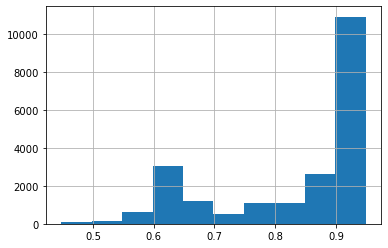

In [196]:
data['city_development_index'].hist(bins=10);

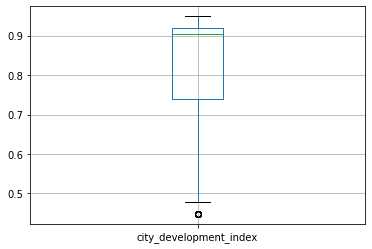

In [197]:
data.boxplot(column='city_development_index');

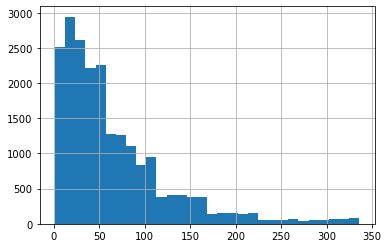

In [198]:
data['training_hours'].hist(bins=30);

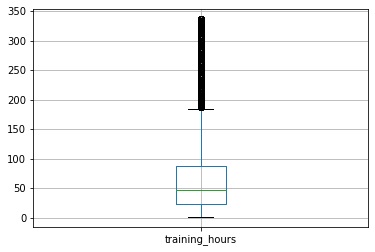

In [199]:
data.boxplot(column='training_hours');

# Data Cleaning

In [15]:
df = data.copy()

## Handling Outliers

## Changing Data Types

In [16]:
#Change enrollee_id and target from numerical to categorical, as they don't have correlationship with other features.

#df['enrollee_id'] = df['enrollee_id'].astype('object')
df['target'] = df['target'].astype('object')
#df.info()

## Correcting Typos

In [17]:
#Replace:
#company_size >
#10/49 with 10-49; 
#100-500 with 100-499; 
#10000+ with >10000.

df['company_size'] = df['company_size'].replace(['10/49','100-500','10000+'],['10-49','100-499','>10000'])
print(df['company_size'].value_counts())

50-99        3421
100-499      2889
>10000       2236
10-49        1643
1000-4999    1471
<10          1471
500-999       965
5000-9999     631
Name: company_size, dtype: int64


## Handle Missing Values

In [37]:
from scipy.stats import mode

In [18]:
#Another way to see missing values:
#calculatin no. of missing values for each column and it's percentage

def percentage_of_miss():
  total_miss = df.isnull().sum().sort_values(ascending=False)
  percent_miss = (df.isnull().sum()/len(df)).sort_values(ascending=False) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)
percentage_of_miss()

Number of Missing  Percentage
company_type                         6774    0.318222
company_size                         6560    0.308169
gender                               5016    0.235637
major_discipline                     3125    0.146803
target                               2129    0.100014
education_level                       512    0.024052
last_new_job                          463    0.021750
enrolled_university                   417    0.019589
experience                             70    0.003288
training_hours                          0    0.000000
source                                  0    0.000000
relevent_experience                     0    0.000000
enrollee_id                             0    0.000000
city_development_index                  0    0.000000
city                                    0    0.000000

### Replace null values with 'unknown':

In [19]:
df.company_type = df.company_type.fillna('unknown')
df.company_size = df.company_size.fillna('unknown')
df.gender = df.gender.fillna('unknown')
df.major_discipline = df.major_discipline.fillna('unknown')

### Replace null values with 'mode':

In [20]:
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

df.education_level = df.education_level.fillna(df.education_level.mode()[0])
df.last_new_job = df.last_new_job.fillna(df.last_new_job.mode()[0])
df.enrolled_university = df.enrolled_university.fillna(df.enrolled_university.mode()[0])
df.experience = df.experience.fillna(df.experience.mode()[0])

df.isna().sum()

city                         0
city_development_index       0
company_size                 0
company_type                 0
education_level              0
enrolled_university          0
enrollee_id                  0
experience                   0
gender                       0
last_new_job                 0
major_discipline             0
relevent_experience          0
source                       0
target                    2129
training_hours               0
dtype: int64

## Handle Duplicates

In [21]:
# Select all duplicate rows based on all columns
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

dupRows = df[df.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
print(dupRows)

All Duplicate Rows based on all columns are :
Empty DataFrame
Columns: [city, city_development_index, company_size, company_type, education_level, enrolled_university, enrollee_id, experience, gender, last_new_job, major_discipline, relevent_experience, source, target, training_hours]
Index: []


# Feature Engineering

In [33]:
df1 = df.copy()

## Adding New Columns

### City_Tier

city_development_index vs. CityTier
0.4-0.6 = Tier3
0.6-0.8 = Tier2
0.8-1 = Tier1

In [38]:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions

conditions = [
    (df1['city_development_index'] > 0.4) & (df1['city_development_index'] <= 0.6),
    (df1['city_development_index'] > 0.6) & (df1['city_development_index'] <= 0.8),
    (df1['city_development_index'] > 0.8)
    ]

# create a list of the values we want to assign for each condition
values = ['Tier3', 'Tier2', 'Tier1']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['CityTier'] = np.select(conditions, values)

df1.head()

city  city_development_index company_size    company_type  \
0  city_103                   0.920      unknown         unknown   
1   city_40                   0.776        50-99         Pvt Ltd   
2   city_21                   0.624      unknown         unknown   
3  city_115                   0.789      unknown         Pvt Ltd   
4  city_162                   0.767        50-99  Funded Startup   

  education_level enrolled_university  enrollee_id  experience   gender  \
0        Graduate       no_enrollment         8949        20.5     Male   
1        Graduate       no_enrollment        29725        15.0     Male   
2        Graduate    Full time course        11561         5.0  unknown   
3        Graduate       no_enrollment        33241         0.5  unknown   
4         Masters       no_enrollment          666        20.5     Male   

  last_new_job major_discipline      relevent_experience source  target  \
0            1             STEM  Has relevent experience  train     1.0   
1           >4             STEM   No relevent experience  train     0.0   
2        never             STEM   No relevent experience  train     0.0   
3        never  Business Degree   No relevent experience  train     1.0   
4            4             STEM  Has relevent experience  train     0.0   

   training_hours CityTier  
0              36    Tier1  
1              47    Tier2  
2              83    Tier2  
3              52    Tier2  
4               8    Tier2

### Profession

experience vs. Profession
<=1 = Novice
1-3 = Junior
3-10 = Experienced
10-20 = Senior
>20 = Expert

In [37]:
#Replace '<1' with '0.5', '>20' with '20.5'
df1['experience'] = df['experience'].replace(['<1','>20'],['0.5','20.5'])

#Conver 'experience' data type from object to float
df1.experience = pd.to_numeric(df1.experience, errors = 'coerce')#If 'coerce', then invalid parsing will be set as NaN.

In [40]:
# create a list of our conditions

conditions = [
    (df1['experience']<=1),
    (df1['experience'] > 1) & (df1['experience'] <= 3),
    (df1['experience'] > 3) & (df1['experience'] <= 10),
    (df1['experience'] > 10) & (df1['experience'] <= 20),
    (df1['experience'] > 20)
    ]

# create a list of the values we want to assign for each condition
values = ['Novice', 'Junior', 'Experienced','Senior','Expert']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['Profession'] = np.select(conditions, values)

df1.head(50)

city  city_development_index company_size         company_type  \
0   city_103                   0.920      unknown              unknown   
1    city_40                   0.776        50-99              Pvt Ltd   
2    city_21                   0.624      unknown              unknown   
3   city_115                   0.789      unknown              Pvt Ltd   
4   city_162                   0.767        50-99       Funded Startup   
5   city_176                   0.764      unknown              unknown   
6   city_160                   0.920        50-99       Funded Startup   
7    city_46                   0.762          <10              Pvt Ltd   
8   city_103                   0.920        50-99              Pvt Ltd   
9   city_103                   0.920       >10000              Pvt Ltd   
10   city_21                   0.624      unknown              unknown   
11  city_103                   0.920    5000-9999              Pvt Ltd   
12   city_61                   0.913    1000-4999              Pvt Ltd   
13   city_21                   0.624      unknown              unknown   
14   city_21                   0.624      unknown              unknown   
15  city_114                   0.926        10-49              Pvt Ltd   
16  city_103                   0.920        50-99              Pvt Ltd   
17   city_21                   0.624    5000-9999              Pvt Ltd   
18   city_21                   0.624       >10000              Pvt Ltd   
19   city_13                   0.827      unknown              unknown   
20  city_159                   0.843      100-499              Pvt Ltd   
21  city_114                   0.926      100-499              Pvt Ltd   
22  city_102                   0.804      unknown              unknown   
23   city_40                   0.776    1000-4999              Pvt Ltd   
24   city_21                   0.624    1000-4999              Pvt Ltd   
25   city_67                   0.855      unknown              unknown   
26   city_21                   0.624      500-999              Pvt Ltd   
27  city_103                   0.920      unknown              unknown   
28  city_100                   0.887          <10              Pvt Ltd   
29   city_21                   0.624        50-99       Funded Startup   
30  city_103                   0.920      100-499              Pvt Ltd   
31  city_103                   0.920    5000-9999              Pvt Ltd   
32  city_103                   0.920      unknown              unknown   
33  city_160                   0.920      100-499              Pvt Ltd   
34   city_16                   0.910    5000-9999              Pvt Ltd   
35  city_103                   0.920        10-49  Early Stage Startup   
36  city_114                   0.926       >10000                Other   
37  city_114                   0.926      100-499              Pvt Ltd   
38  city_103                   0.920      unknown              unknown   
39   city_71                   0.884      unknown              unknown   
40  city_114                   0.926    1000-4999        Public Sector   
41  city_104                   0.924        10-49              Pvt Ltd   
42   city_21                   0.624        50-99  Early Stage Startup   
43   city_64                   0.666        50-99              Pvt Ltd   
44   city_21                   0.624    5000-9999              Pvt Ltd   
45   city_21                   0.624      unknown              unknown   
46   city_21                   0.624      100-499              Pvt Ltd   
47  city_103                   0.920       >10000        Public Sector   
48  city_101                   0.558      unknown              unknown   
49   city_83                   0.923        10-49              Pvt Ltd   

   education_level enrolled_university  enrollee_id  experience   gender  \
0         Graduate       no_enrollment         8949        20.5     Male   
1         Graduate       no_enrollment        29725        15.0     Male   
2    

### Company_Scale

company_size vs. CompanyScale
<500 = Small
500-5000 = Medium
>5000 = Large

In [50]:
df1['company_size'].value_counts()

unknown      6560
50-99        3421
100-499      2889
>10000       2236
10-49        1643
1000-4999    1471
<10          1471
500-999       965
5000-9999     631
Name: company_size, dtype: int64

In [51]:
#https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

def co_size (row):
    if row['company_size'] == "<10" :
          return 'Small'
    if row['company_size'] == "10-49" :
          return 'Small'
    if row['company_size'] == "50-99" :
          return 'Small'
    if row['company_size'] == "100-499" :
          return 'Small'
    if row['company_size'] == "500-999" :
          return 'Medium'
    if row['company_size'] == "1000-4999" :
          return 'Medium'
    if row['company_size'] == "5000-9999" :
          return 'Large'
    if row['company_size'] == ">10000" :
          return 'Large'
    return 'Unknown'

In [53]:
df1['CompanyScale'] = df1.apply (lambda row: co_size(row), axis=1)
df1.head()

city  city_development_index company_size    company_type  \
0  city_103                   0.920      unknown         unknown   
1   city_40                   0.776        50-99         Pvt Ltd   
2   city_21                   0.624      unknown         unknown   
3  city_115                   0.789      unknown         Pvt Ltd   
4  city_162                   0.767        50-99  Funded Startup   

  education_level enrolled_university  enrollee_id  experience   gender  \
0        Graduate       no_enrollment         8949        20.5     Male   
1        Graduate       no_enrollment        29725        15.0     Male   
2        Graduate    Full time course        11561         5.0  unknown   
3        Graduate       no_enrollment        33241         0.5  unknown   
4         Masters       no_enrollment          666        20.5     Male   

  last_new_job major_discipline      relevent_experience source  target  \
0            1             STEM  Has relevent experience  train     1.0   
1           >4             STEM   No relevent experience  train     0.0   
2        never             STEM   No relevent experience  train     0.0   
3        never  Business Degree   No relevent experience  train     1.0   
4            4             STEM  Has relevent experience  train     0.0   

   training_hours CityTier   Profession CompanyScale  
0              36    Tier1       Expert      Unknown  
1              47    Tier2       Senior        Small  
2              83    Tier2  Experienced      Unknown  
3              52    Tier2       Novice      Unknown  
4               8    Tier2       Expert        Small

### StudyHard

training_hours vs. StudyHard
<20 = NotHard
20-40 = LessHard
40-80 = Acceptable
80-160 = Hard
>160 = VeryHard

In [54]:
# create a list of our conditions

conditions = [
    (df1['training_hours']<=20),
    (df1['training_hours'] > 20) & (df1['training_hours'] <= 40),
    (df1['training_hours'] > 40) & (df1['training_hours'] <= 80),
    (df1['training_hours'] > 80) & (df1['training_hours'] <= 160),
    (df1['training_hours'] > 160)
    ]

# create a list of the values we want to assign for each condition
values = ['NotHard', 'LessHard', 'Acceptable','Hard','VeryHard']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['StudyHard'] = np.select(conditions, values)

df1.head(50)

city  city_development_index company_size         company_type  \
0   city_103                   0.920      unknown              unknown   
1    city_40                   0.776        50-99              Pvt Ltd   
2    city_21                   0.624      unknown              unknown   
3   city_115                   0.789      unknown              Pvt Ltd   
4   city_162                   0.767        50-99       Funded Startup   
5   city_176                   0.764      unknown              unknown   
6   city_160                   0.920        50-99       Funded Startup   
7    city_46                   0.762          <10              Pvt Ltd   
8   city_103                   0.920        50-99              Pvt Ltd   
9   city_103                   0.920       >10000              Pvt Ltd   
10   city_21                   0.624      unknown              unknown   
11  city_103                   0.920    5000-9999              Pvt Ltd   
12   city_61                   0.913    1000-4999              Pvt Ltd   
13   city_21                   0.624      unknown              unknown   
14   city_21                   0.624      unknown              unknown   
15  city_114                   0.926        10-49              Pvt Ltd   
16  city_103                   0.920        50-99              Pvt Ltd   
17   city_21                   0.624    5000-9999              Pvt Ltd   
18   city_21                   0.624       >10000              Pvt Ltd   
19   city_13                   0.827      unknown              unknown   
20  city_159                   0.843      100-499              Pvt Ltd   
21  city_114                   0.926      100-499              Pvt Ltd   
22  city_102                   0.804      unknown              unknown   
23   city_40                   0.776    1000-4999              Pvt Ltd   
24   city_21                   0.624    1000-4999              Pvt Ltd   
25   city_67                   0.855      unknown              unknown   
26   city_21                   0.624      500-999              Pvt Ltd   
27  city_103                   0.920      unknown              unknown   
28  city_100                   0.887          <10              Pvt Ltd   
29   city_21                   0.624        50-99       Funded Startup   
30  city_103                   0.920      100-499              Pvt Ltd   
31  city_103                   0.920    5000-9999              Pvt Ltd   
32  city_103                   0.920      unknown              unknown   
33  city_160                   0.920      100-499              Pvt Ltd   
34   city_16                   0.910    5000-9999              Pvt Ltd   
35  city_103                   0.920        10-49  Early Stage Startup   
36  city_114                   0.926       >10000                Other   
37  city_114                   0.926      100-499              Pvt Ltd   
38  city_103                   0.920      unknown              unknown   
39   city_71                   0.884      unknown              unknown   
40  city_114                   0.926    1000-4999        Public Sector   
41  city_104                   0.924        10-49              Pvt Ltd   
42   city_21                   0.624        50-99  Early Stage Startup   
43   city_64                   0.666        50-99              Pvt Ltd   
44   city_21                   0.624    5000-9999              Pvt Ltd   
45   city_21                   0.624      unknown              unknown   
46   city_21                   0.624      100-499              Pvt Ltd   
47  city_103                   0.920       >10000        Public Sector   
48  city_101                   0.558      unknown              unknown   
49   city_83                   0.923        10-49              Pvt Ltd   

   education_level enrolled_university  enrollee_id  experience   gender  \
0         Graduate       no_enrollment         8949        20.5     Male   
1         Graduate       no_enrollment        29725        15.0     Male   
2    

## Check New Columns Status

In [55]:
df1.isna().sum()

city                         0
city_development_index       0
company_size                 0
company_type                 0
education_level              0
enrolled_university          0
enrollee_id                  0
experience                   0
gender                       0
last_new_job                 0
major_discipline             0
relevent_experience          0
source                       0
target                    2129
training_hours               0
CityTier                     0
Profession                   0
CompanyScale                 0
StudyHard                    0
dtype: int64

In [56]:
#The level of key features have been minimized.

categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns 
                       if x not in ['source','city_development_index','company_size','experience','training_hours']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(df1[col].value_counts())


Frequency of Categories for variable city
city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
            ... 
city_121       4
city_129       3
city_111       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64

Frequency of Categories for variable company_type
Pvt Ltd                10958
unknown                 6774
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64

Frequency of Categories for variable education_level
Graduate          13379
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

Frequency of Categories for variable enrolled_university
no_enrollment       15753
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64

Frequency of Categories for variable gender
Male       146

# Univariate Analysis

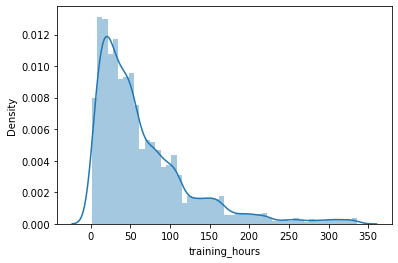

In [183]:
sns.distplot(df1['training_hours']);

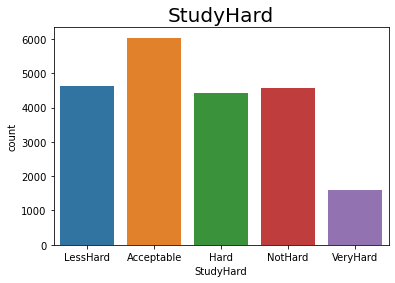

In [182]:
sns.countplot(df1['StudyHard'])
plt.title("StudyHard", y=1, fontdict={"fontsize": 20});

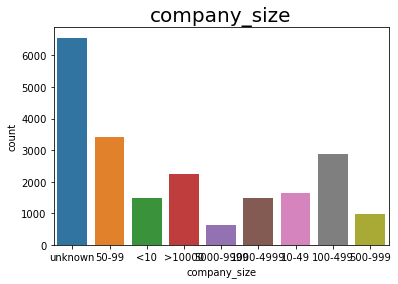

In [181]:
sns.countplot(df1['company_size'])
plt.title("company_size", y=1, fontdict={"fontsize": 20});

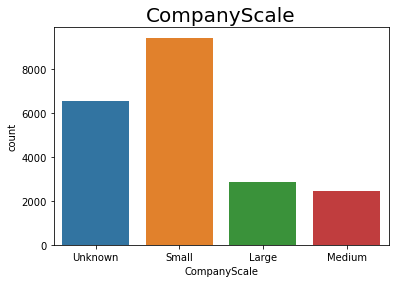

In [180]:
sns.countplot(df1['CompanyScale'])
plt.title("CompanyScale", y=1, fontdict={"fontsize": 20});

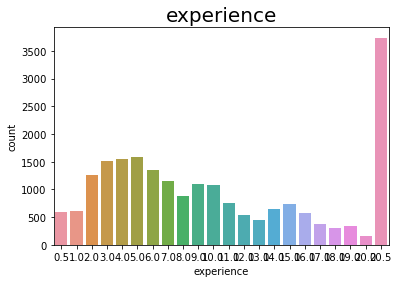

In [179]:
sns.countplot(df1['experience'])
plt.title("experience", y=1, fontdict={"fontsize": 20});

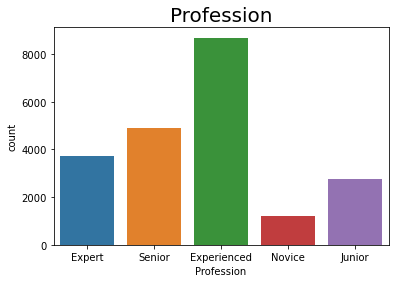

In [178]:
sns.countplot(df1['Profession'])
plt.title("Profession", y=1, fontdict={"fontsize": 20});

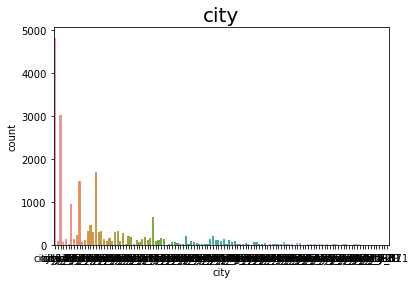

In [177]:
sns.countplot(df1['city'])
plt.title("city", y=1, fontdict={"fontsize": 20});

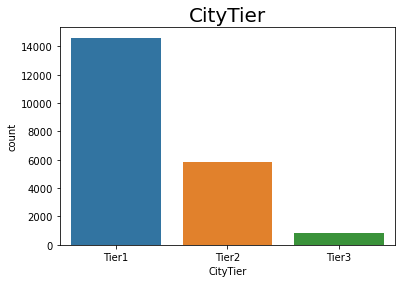

In [176]:
sns.countplot(df1['CityTier'])
plt.title("CityTier", y=1, fontdict={"fontsize": 20});

# Bivariate Analysis

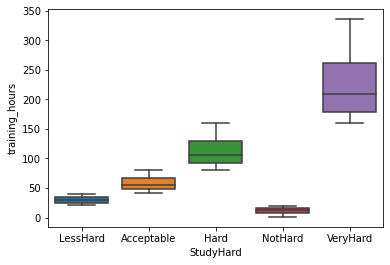

In [184]:
ax = sns.boxplot(x='StudyHard', y='training_hours', data=df1)

In [186]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df1[c1],df1[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

In [215]:
chi_square('education_level','target')

[[9051.36747051 3006.63252949]
 [1514.06602986  502.93397014]
 [3273.59541706 1087.40458294]
 [ 310.77012214  103.22987786]
 [ 231.20096043   76.79903957]]

Chi-square is : 160.45409183708534 

p_value is : 1.168254108960399e-33 

degree of freedom is :4

There is some correlation between the two variables at 0.05 significant level


In [217]:
chi_square('city','target')

[[1.95169642e+01 6.48303581e+00]
 [6.45561123e+01 2.14438877e+01]
 [2.06429429e+02 6.85705710e+01]
 [5.62989352e+01 1.87010648e+01]
 [2.28198351e+02 7.58016494e+01]
 [3.26909150e+03 1.08590850e+03]
 [2.25946393e+02 7.50536068e+01]
 [5.93015450e+01 1.96984550e+01]
 [6.75587222e+00 2.24412778e+00]
 [4.50391481e+00 1.49608519e+00]
 [6.75587222e+00 2.24412778e+00]
 [1.85411160e+02 6.15888402e+01]
 [2.25195741e+00 7.48042593e-01]
 [1.00287170e+03 3.33128301e+02]
 [4.05352333e+01 1.34647667e+01]
 [9.60835160e+01 3.19164840e+01]
 [9.75848210e+00 3.24151790e+00]
 [2.02676167e+01 6.73238334e+00]
 [9.75848210e+00 3.24151790e+00]
 [4.50391481e+00 1.49608519e+00]
 [2.25195741e+00 7.48042593e-01]
 [5.93015450e+01 1.96984550e+01]
 [2.10182691e+01 6.98173087e+00]
 [7.50652469e+00 2.49347531e+00]
 [6.90600271e+01 2.29399729e+01]
 [2.25195741e+00 7.48042593e-01]
 [3.60313185e+01 1.19686815e+01]
 [6.75587222e+00 2.24412778e+00]
 [7.50652469e+00 2.49347531e+00]
 [3.22780562e+01 1.07219438e+01]
 [4.398823

In [218]:
chi_square('training_hours','target')

[[  6.75587222   2.24412778]
 [ 72.06263702  23.93736298]
 [ 89.3276438   29.6723562 ]
 [168.14615304  55.85384696]
 [ 80.31981418  26.68018582]
 [195.92029439  65.07970561]
 [156.88636601  52.11363399]
 [170.39811045  56.60188955]
 [175.65267773  58.34732227]
 [180.90724502  60.09275498]
 [177.90463514  59.09536486]
 [219.19052093  72.80947907]
 [159.88897588  53.11102412]
 [173.40072033  57.59927967]
 [172.65006786  57.34993214]
 [144.12527404  47.87472596]
 [204.92812402  68.07187598]
 [218.43986846  72.56013154]
 [122.35635244  40.64364756]
 [208.68138637  69.31861363]
 [192.16703205  63.83296795]
 [211.68399624  70.31600376]
 [193.66833699  64.33166301]
 [204.92812402  68.07187598]
 [149.37984132  49.62015868]
 [190.66572711  63.33427289]
 [ 87.0756864   28.9243136 ]
 [246.96466228  82.03533772]
 [134.36679194  44.63320806]
 [140.37201169  46.62798831]
 [138.12005429  45.87994571]
 [155.38506107  51.61493893]
 [112.59787034  37.40212966]
 [195.92029439  65.07970561]
 [121.60569997

In [219]:
chi_square('experience','target')

[[ 412.10820545  136.89179455]
 [ 739.39268191  245.60731809]
 [ 498.43323938  165.56676062]
 [ 370.82231966  123.17768034]
 [ 299.51033511   99.48966489]
 [ 439.8823468   146.1176532 ]
 [ 514.94759369  171.05240631]
 [ 381.33145422  126.66854578]
 [ 256.72314438   85.27685562]
 [ 210.1826913    69.8173087 ]
 [ 228.19835056   75.80164944]
 [ 845.9853325   281.0146675 ]
 [ 111.0965654    36.9034346 ]
 [1016.38344295  337.61655705]
 [1053.16541393  349.83458607]
 [1073.43303059  356.56696941]
 [ 912.79340223  303.20659777]
 [ 771.67073807  256.32926193]
 [ 602.02328009  199.97671991]
 [ 735.63941956  244.36058044]
 [ 391.84058879  130.15941121]
 [2515.43642343  835.56357657]]

Chi-square is : 690.9832700993716 

p_value is : 1.0660610956976657e-132 

degree of freedom is :21

There is some correlation between the two variables at 0.05 significant level


In [220]:
chi_square('company_size','target')

[[1104.20978181  366.79021819]
 [1929.92749765  641.07250235]
 [ 996.86647876  331.13352124]
 [2314.26156175  768.73843825]
 [ 658.32221526  218.67778474]
 [ 422.61734001  140.38265999]
 [ 981.85342938  326.14657062]
 [1515.56733479  503.43266521]
 [4457.37436058 1480.62563942]]

Chi-square is : 1161.9575358750167 

p_value is : 1.5874534712450328e-245 

degree of freedom is :8

There is some correlation between the two variables at 0.05 significant level


In [221]:
chi_square('gender','target')

[[ 929.30775655  308.69224345]
 [9924.37629189 3296.62370811]
 [ 143.37462157   47.62537843]
 [3383.94132999 1124.05867001]]

Chi-square is : 117.37718415317732 

p_value is : 2.83304872204523e-25 

degree of freedom is :3

There is some correlation between the two variables at 0.05 significant level


## Conclusion from Bivariate Analysis

# Dropping Irrelevant Features

In [57]:
df2 = df1.copy()

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    21287 non-null  object 
 1   city_development_index  21287 non-null  float64
 2   company_size            21287 non-null  object 
 3   company_type            21287 non-null  object 
 4   education_level         21287 non-null  object 
 5   enrolled_university     21287 non-null  object 
 6   enrollee_id             21287 non-null  int64  
 7   experience              21287 non-null  float64
 8   gender                  21287 non-null  object 
 9   last_new_job            21287 non-null  object 
 10  major_discipline        21287 non-null  object 
 11  relevent_experience     21287 non-null  object 
 12  source                  21287 non-null  object 
 13  target                  19158 non-null  float64
 14  training_hours          21287 non-null

In [59]:
#Drop the original features corresponding to above new added columns.
df2.drop(labels=['city_development_index', 'company_size','experience','training_hours'], axis=1, inplace=True)#inplace=True to update df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 21287 non-null  object 
 1   company_type         21287 non-null  object 
 2   education_level      21287 non-null  object 
 3   enrolled_university  21287 non-null  object 
 4   enrollee_id          21287 non-null  int64  
 5   gender               21287 non-null  object 
 6   last_new_job         21287 non-null  object 
 7   major_discipline     21287 non-null  object 
 8   relevent_experience  21287 non-null  object 
 9   source               21287 non-null  object 
 10  target               19158 non-null  float64
 11  CityTier             21287 non-null  object 
 12  Profession           21287 non-null  object 
 13  CompanyScale         21287 non-null  object 
 14  StudyHard            21287 non-null  object 
dtypes: float64(1), int64(1), object(13)


# Creating Dummy Variables

In [61]:
#Encode using dummy variable encoding assuming the categorical variables are nominal
df3 = df2.copy()
df3 = pd.get_dummies(df3, columns=[
                                        'enrolled_university',
                                        'gender',
                                        'major_discipline',
                                        'relevent_experience',
                                        'CityTier',
                                        'Profession',
                                        'CompanyScale',
                                        'StudyHard'
                                    ]
                                        #drop_first=True
                    )
df3.head()

city    company_type education_level  enrollee_id last_new_job source  \
0  city_103         unknown        Graduate         8949            1  train   
1   city_40         Pvt Ltd        Graduate        29725           >4  train   
2   city_21         unknown        Graduate        11561        never  train   
3  city_115         Pvt Ltd        Graduate        33241        never  train   
4  city_162  Funded Startup         Masters          666            4  train   

   target  enrolled_university_Full time course  \
0     1.0                                     0   
1     0.0                                     0   
2     0.0                                     1   
3     1.0                                     0   
4     0.0                                     0   

   enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                     0                                  1   
1                                     0                                  1   
2                                     0                                  0   
3                                     0                                  1   
4                                     0                                  1   

   ...  Profession_Senior  CompanyScale_Large  CompanyScale_Medium  \
0  ...                  0                   0                    0   
1  ...                  1                   0                    0   
2  ...                  0                   0                    0   
3  ...                  0                   0                    0   
4  ...                  0                   0                    0   

   CompanyScale_Small  CompanyScale_Unknown  StudyHard_Acceptable  \
0                   0                     1                     0   
1                   1                     0                     1   
2                   0                     1                     0   
3                   0                     1                     1   
4                   1                     0                     0   

   StudyHard_Hard  StudyHard_LessHard  StudyHard_NotHard  StudyHard_VeryHard  
0               0                   1                  0                   0  
1               0                   0                  0                   0  
2               1                   0                  0                   0  
3               0                   0                  0                   0  
4               0                   0                  1                   0  

[5 rows x 40 columns]

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city                                         21287 non-null  object 
 1   company_type                                 21287 non-null  object 
 2   education_level                              21287 non-null  object 
 3   enrollee_id                                  21287 non-null  int64  
 4   last_new_job                                 21287 non-null  object 
 5   source                                       21287 non-null  object 
 6   target                                       19158 non-null  float64
 7   enrolled_university_Full time course         21287 non-null  uint8  
 8   enrolled_university_Part time course         21287 non-null  uint8  
 9   enrolled_university_no_enrollment            21287 non-null  uint8  
 10

In [63]:
df3.astype('object').describe().transpose()

count unique       top   freq
city                                         21287    123  city_103   4828
company_type                                 21287      7   Pvt Ltd  10958
education_level                              21287      5  Graduate  13379
enrollee_id                                  21287  21287     32766      1
last_new_job                                 21287      6         1   9387
source                                       21287      2     train  19158
target                                       19158      2         0  14381
enrolled_university_Full time course         21287      2         0  17095
enrolled_university_Part time course         21287      2         0  19945
enrolled_university_no_enrollment            21287      2         1  15753
gender_Female                                21287      2         0  19912
gender_Male                                  21287      2         1  14681
gender_Other                                 21287      2         0  21072
gender_unknown                               21287      2         0  16271
major_discipline_Arts                        21287      2         0  21017
major_discipline_Business Degree             21287      2         0  20923
major_discipline_Humanities                  21287      2         0  20538
major_discipline_No Major                    21287      2         0  21042
major_discipline_Other                       21287      2         0  20866
major_discipline_STEM                        21287      2         1  16113
major_discipline_unknown                     21287      2         0  18162
relevent_experience_Has relevent experience  21287      2         1  15316
relevent_experience_No relevent experience   21287      2         0  15316
CityTier_Tier1                               21287      2         1  14619
CityTier_Tier2                               21287      2         0  15427
CityTier_Tier3                               21287      2         0  20479
Profession_Experienced                       21287      2         0  12598
Profession_Expert                            21287      2         0  17548
Profession_Junior                            21287      2         0  18524
Profession_Novice                            21287      2         0  20086
Profession_Senior                            21287      2         0  16392
CompanyScale_Large                           21287      2         0  18420
CompanyScale_Medium                          21287      2         0  18851
CompanyScale_Small                           21287      2         0  11863
CompanyScale_Unknown                         21287      2         0  14727
StudyHard_Acceptable                         21287      2         0  15250
StudyHard_Hard                               21287      2         0  16855
StudyHard_LessHard                           21287      2         0  16655
StudyHard_NotHard                            21287      2         0  16706
StudyHard_VeryHard                           21287      2         0  19682

In [64]:
#shuffle the dataset for proper sampling

df3 = df3.sample(frac = 1, random_state=1)

# Saving to Train and Test Files

In [174]:
#Divide into test and train:
train = df3.loc[df3['source']=="train"]
test = df3.loc[df3['source']=="test"]

#Drop unnecessary columns:
test.drop(['target','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

In [114]:
#Read Files:
dtrain = pd.read_csv("data/train_modified.csv")
dtest = pd.read_csv("data/test_modified.csv")

In [115]:
df4 = dtrain.drop(['city','company_type','education_level','enrollee_id','last_new_job'], axis=1)

In [116]:
#correlation study
df4.corr()

target  \
target                                       1.000000   
enrolled_university_Full time course         0.150171   
enrolled_university_Part time course         0.001635   
enrolled_university_no_enrollment           -0.137071   
gender_Female                                0.008494   
gender_Male                                 -0.074256   
gender_Other                                 0.002884   
gender_unknown                               0.075356   
major_discipline_Arts                       -0.010659   
major_discipline_Business Degree             0.004157   
major_discipline_Humanities                 -0.016965   
major_discipline_No Major                   -0.000680   
major_discipline_Other                       0.006048   
major_discipline_STEM                        0.049881   
major_discipline_unknown                    -0.051955   
relevent_experience_Has relevent experience -0.128430   
relevent_experience_No relevent experience   0.128430   
CityTier_Tier1                              -0.308586   
CityTier_Tier2                               0.255804   
CityTier_Tier3                               0.151256   
Profession_Experienced                       0.042721   
Profession_Expert                           -0.098314   
Profession_Junior                            0.083859   
Profession_Novice                            0.106583   
Profession_Senior                           -0.086226   
CompanyScale_Large                          -0.055405   
CompanyScale_Medium                         -0.074783   
CompanyScale_Small                          -0.139690   
CompanyScale_Unknown                         0.242456   
StudyHard_Acceptable                         0.009848   
StudyHard_Hard                              -0.008586   
StudyHard_LessHard                           0.009283   
StudyHard_NotHard                            0.001744   
StudyHard_VeryHard                          -0.020779   

                                             enrolled_university_Full time course  \
target                                                                   0.150171   
enrolled_university_Full time course                                     1.000000   
enrolled_university_Part time course                                    -0.127562   
enrolled_university_no_enrollment                                       -0.836208   
gender_Female                                                           -0.014319   
gender_Male                                                             -0.079801   
gender_Other                                                             0.013952   
gender_unknown                                                           0.092031   
major_discipline_Arts                                                   -0.042166   
major_discipline_Business Degree                                        -0.038697   
major_discipline_Humanities                                             -0.063158   
major_discipline_No Major                                               -0.030313   
major_discipline_Other                                                  -0.013857   
major_discipline_STEM                                                   -0.067985   
major_discipline_unknown                                                 0.157618   
relevent_experience_Has relevent experience                             -0.369085   
relevent_experience_No relevent experience                               0.369085   
CityTier_Tier1                                                          -0.154448   
CityTier_Tier2                                                           0.142203   
CityTier_Tier3                                                           0.042593   
Profession_Experienced                                                   0.118902   
Profession_Expert                                                       -0.191766   
Profession_Junior                                                        0.173244   
Profession_

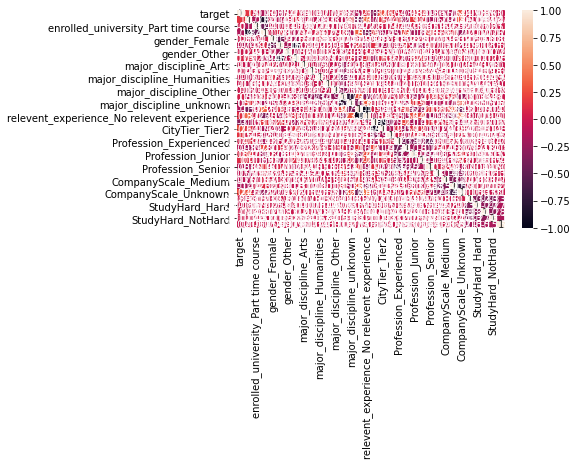

In [175]:
#Heat Map
import seaborn as sns
sns.heatmap(df4.corr(), annot=True);

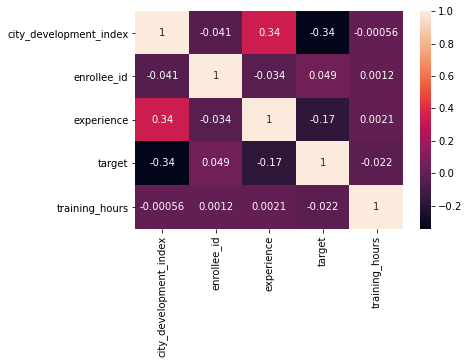

In [200]:
#Heat Map
import seaborn as sns
sns.heatmap(df1.corr(), annot=True);

# Logistic Regression

In [98]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [140]:
#Extract dependent and independent variables
y=df4.target
X=df4.drop('target', axis=1)
X.head()

enrolled_university_Full time course  enrolled_university_Part time course  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   enrolled_university_no_enrollment  gender_Female  gender_Male  \
0                                  1              0            1   
1                                  1              0            1   
2                                  1              0            0   
3                                  1              0            1   
4                                  1              0            1   

   gender_Other  gender_unknown  major_discipline_Arts  \
0             0               0                      0   
1             0               0                      0   
2             0               1                      0   
3             0               0                      0   
4             0               0                      0   

   major_discipline_Business Degree  major_discipline_Humanities  ...  \
0                                 0                            0  ...   
1                                 0                            0  ...   
2                                 0                            0  ...   
3                                 0                            0  ...   
4                                 0                            0  ...   

   Profession_Senior  CompanyScale_Large  CompanyScale_Medium  \
0                  1                   1                    0   
1                  1                   0                    1   
2                  0                   1                    0   
3                  0                   0                    0   
4                  1                   0                    1   

   CompanyScale_Small  CompanyScale_Unknown  StudyHard_Acceptable  \
0                   0                     0                     0   
1                   0                     0                     1   
2                   0                     0                     0   
3                   1                     0                     0   
4                   0                     0                     0   

   StudyHard_Hard  StudyHard_LessHard  StudyHard_NotHard  StudyHard_VeryHard  
0               1                   0                  0                   0  
1               0                   0                  0                   0  
2               0                   0                  1                   0  
3               1                   0                  0                   0  
4               0                   0                  1                   0  

[5 rows x 33 columns]

In [121]:
y.unique()

array([1., 0.])

In [122]:
#Ensuring that all variables are numeric now
X.describe().transpose()

count      mean       std  min  \
enrolled_university_Full time course         19158.0  0.196106  0.397060  0.0   
enrolled_university_Part time course         19158.0  0.062533  0.242127  0.0   
enrolled_university_no_enrollment            19158.0  0.741361  0.437898  0.0   
gender_Female                                19158.0  0.064621  0.245861  0.0   
gender_Male                                  19158.0  0.690103  0.462463  0.0   
gender_Other                                 19158.0  0.009970  0.099352  0.0   
gender_unknown                               19158.0  0.235306  0.424201  0.0   
major_discipline_Arts                        19158.0  0.013206  0.114159  0.0   
major_discipline_Business Degree             19158.0  0.017069  0.129530  0.0   
major_discipline_Humanities                  19158.0  0.034920  0.183582  0.0   
major_discipline_No Major                    19158.0  0.011640  0.107262  0.0   
major_discipline_Other                       19158.0  0.019887  0.139617  0.0   
major_discipline_STEM                        19158.0  0.756446  0.429238  0.0   
major_discipline_unknown                     19158.0  0.146832  0.353947  0.0   
relevent_experience_Has relevent experience  19158.0  0.719908  0.449056  0.0   
relevent_experience_No relevent experience   19158.0  0.280092  0.449056  0.0   
CityTier_Tier1                               19158.0  0.688590  0.463082  0.0   
CityTier_Tier2                               19158.0  0.273567  0.445801  0.0   
CityTier_Tier3                               19158.0  0.037843  0.190822  0.0   
Profession_Experienced                       19158.0  0.409437  0.491743  0.0   
Profession_Expert                            19158.0  0.174914  0.379903  0.0   
Profession_Junior                            19158.0  0.129502  0.335764  0.0   
Profession_Novice                            19158.0  0.055904  0.229741  0.0   
Profession_Senior                            19158.0  0.230243  0.420999  0.0   
CompanyScale_Large                           19158.0  0.134774  0.341491  0.0   
CompanyScale_Medium                          19158.0  0.115096  0.319146  0.0   
CompanyScale_Small                           19158.0  0.440182  0.496422  0.0   
CompanyScale_Unknown                         19158.0  0.309949  0.462484  0.0   
StudyHard_Acceptable                         19158.0  0.283693  0.450802  0.0   
StudyHard_Hard                               19158.0  0.208268  0.406080  0.0   
StudyHard_LessHard                           19158.0  0.216933  0.412167  0.0   
StudyHard_NotHard                            19158.0  0.215419  0.411124  0.0   
StudyHard_VeryHard                           19158.0  0.075686  0.264503  0.0   

                                             25%  50%  75%  max  
enrolled_university_Full time course         0.0  0.0  0.0  1.0  
enrolled_university_Part time course         0.0  0.0  0.0  1.0  
enrolled_university_no_enrollment            0.0  1.0  1.0  1.0  
gender_Female                                0.0  0.0  0.0  1.0  
gender_Male                                  0.0  1.0  1.0  1.0  
gender_Other                                 0.0  0.0  0.0  1.0  
gender_unknown                               0.0  0.0  0.0  1.0  
major_discipline_Arts                        0.0  0.0  0.0  1.0  
major_discipline_Business Degree             0.0  0.0  0.0  1.0  
major_discipline_Humanities                  0.0  0.0  0.0  1.0  
major_discipline_No Major                    0.0  0.0  0.0  1.0  
major_discipline_Other                       0.0  0.0  0.0  1.0  
major_discipline_STEM                        1.0  1.0  1.0  1.0  
major_discipline_unknown                     0.0  0.0  0.0  1.0  
relevent_experience_Has relevent experience  0.0  1.0  1.0  1.0  
relevent_experience_No relevent experience   0.0  0.0  1.0  1.0  
CityTier_Tier1                               0.0  1.0  1.0  1.0  
CityTier_Tier2                               0.0  0.0  1.0  1.0  
CityTier_Tier3                        

In [123]:
#Do k-fold cross validation using Logistic Regression

cross_val_score(LogisticRegression(max_iter=1000,tol=0.001),X,y,cv=5).mean()

0.7633365921019004

In [124]:
#Split into training and test set for cross-validation

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [125]:
#train the model on the training set
model = LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [126]:
#Test accuracy
model.score(X_test,y_test)

0.7647181628392484

In [127]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      3592
         1.0       0.57      0.23      0.33      1198

    accuracy                           0.76      4790
   macro avg       0.68      0.59      0.59      4790
weighted avg       0.73      0.76      0.72      4790

[[3390  202]
 [ 925  273]]


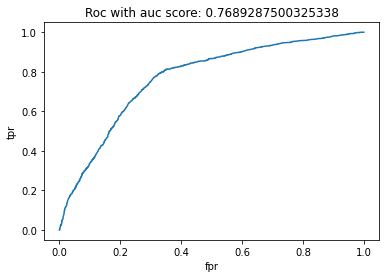

In [132]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#taking the second column for correct auc score
y_pred_prob = model.predict_proba(X_test)[:,1] 

#second column represents the 'target=1' class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

#plot the curve with auc score
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()


In [ ]:
def modelfit(model, data, predictors, outcome,test_data):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
      predictions = model.predict(data[predictors])

    print ("\nModel Report")
    print(model)
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #print cross_val_score
  #cv_score=cross_val_score(model,data[predictors],data[outcome],cv=20).mean()  
  #print("Cross_validation_score : %s" % "{0:.3%}".format(cv_score))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
    prediction=model.predict(test_data[predictors])
    
  #confusion_matrix
    print(classification_report(test_data[outcome],prediction))
    print(confusion_matrix(test_data[outcome],prediction))

In [152]:
#https://stackoverflow.com/questions/48641290/typeerror-kfold-object-is-not-iterable

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
  #Fit the model:
    model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_splits=5)
    error = []
    for train, test in kf.split(data):
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

# Decision Tree

In [148]:
#hyper-parameter tuning on DecisionTree's max-depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,5,1):
    model = DecisionTreeRegressor(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
    scores.append(kfold_score)

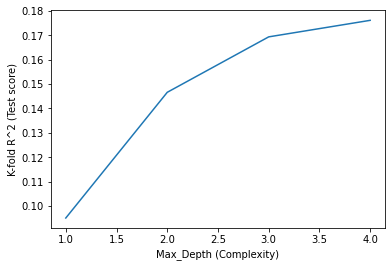

In [149]:
#plot k-fold scores vs max_depth values
import matplotlib.pyplot as plt
plt.plot(range(1,5,1),scores)
plt.xlabel('Max_Depth (Complexity)')
plt.ylabel('K-fold R^2 (Test score)')
plt.show()

In [150]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X,y)

DecisionTreeRegressor(max_depth=5)

[Text(167.4, 181.2, 'CityTier_Tier1 <= 0.5\nmse = 0.187\nsamples = 19158\nvalue = 0.249'),
 Text(83.7, 108.72, 'Profession_Expert <= 0.5\nmse = 0.247\nsamples = 5966\nvalue = 0.448'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'CompanyScale_Unknown <= 0.5\nmse = 0.134\nsamples = 13192\nvalue = 0.16'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

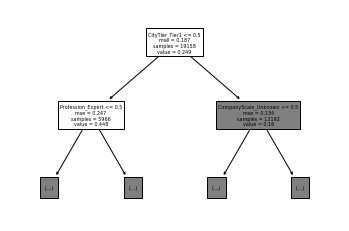

In [139]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=X.columns,max_depth=1)

In [151]:
cross_val_score(DecisionTreeRegressor(max_depth=5),X,y,cv=5).mean()

0.17689651176150234

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [205]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(1,11,1):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

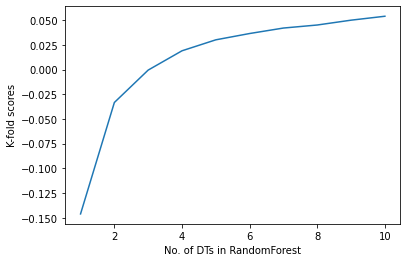

In [206]:
plt.plot(range(1,11,1),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

# KNN - CV Score 0.744

In [201]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [202]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=3).mean()

0.7445975571562794

In [203]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

In [207]:
print(scores)

[-0.14611276126461553, -0.03335753149286891, -0.0005685021495407394, 0.018954626123268453, 0.030054803263301566, 0.03643604254126573, 0.041975170206419526, 0.04505057666405435, 0.04994204965368329, 0.05391405851095976]


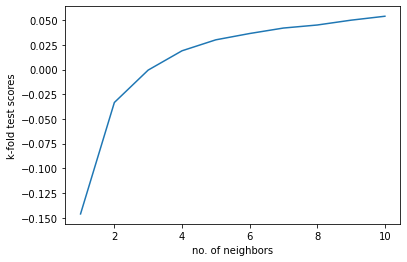

In [208]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


# Kmeans

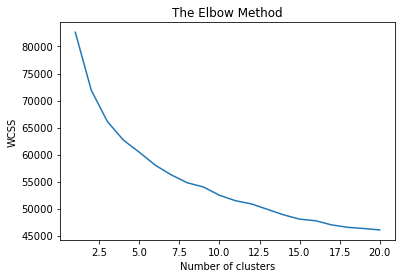

In [212]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Conclusion (technically)

# THANK YOU FOR YOUR TIME!